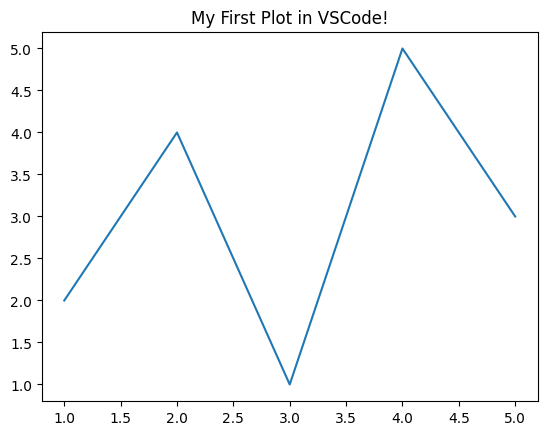

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample data
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 1, 5, 3]}
df = pd.DataFrame(data)

plt.plot(df['x'], df['y'])
plt.title('My First Plot in VSCode!')
plt.show()

In [3]:
data = pd.read_csv('synthetic_coffee_health_10000.csv')
print(data.head())
print(data.info())
print(data.describe())
for col in data.columns:
    print(f"{col}: {data[col].isnull().sum()}")

   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption  
0           NaN      Other        0                    0 

In [4]:
import seaborn as sns
import numpy as np
print(data.dtypes)
print(data["Sleep_Quality"].unique())
mapper = {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4}
data["Sleep_Quality"] = data["Sleep_Quality"].map(mapper)
print(data["Health_Issues"].value_counts())
print(data)


ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object
['Good' 'Fair' 'Excellent' 'Poor']
Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
         ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0         1   40    Male  Germany            3.5        328.1          7.5   
1         2   33    Male  Germany            1.0         94.1          6.2   
2         3   42    Male   Brazil            5.3        503.7     

In [5]:

print(data["Stress_Level"].value_counts())
print(data["Gender"].value_counts())
print(data["Country"].value_counts())
print(data["Occupation"].value_counts())
print(data["Health_Issues"].value_counts())
health_mapper = {
    "Low": 1,
    "Medium": 2, 
    "High": 3
}
health_issues_mapper = {
    "Mild": 1,
    "Moderate": 2, 
    "Severe": 3
}
data["Health_Issues"] = data["Health_Issues"].map(health_issues_mapper)
data["Stress_Level"] = data["Stress_Level"].map(health_mapper)
data_genders = pd.get_dummies(data['Gender'], dtype = int)
data = pd.concat([data, data_genders], axis = 1)
data = data.drop(columns = ['Gender'])
for i in data.columns:
    if data[i].dtype == 'object' or data[i].dtype == 'str':
        print(i)
print(data)
data = data.drop(columns=["ID"])
from sklearn.preprocessing import TargetEncoder
encoder = TargetEncoder()
X_encoded = encoder.fit_transform(data[['Country']], data['Heart_Rate'])
data['Country'] = X_encoded
X_encoded2 = encoder.fit_transform(data[['Occupation']], data['Heart_Rate'])
data['Occupation'] = X_encoded2
print(data)

Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64
Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64
Occupation
Office        2073
Other         2038
Student       1968
Healthcare    1964
Service       1957
Name: count, dtype: int64
Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
Country
Occupation
         ID  Age  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0         1   40  Germany            3.5        328.1          7.5   
1         2   33  Germany            1.0  

c:\Users\Jaden\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Jaden\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
## data[data.columns] = ss.fit_transform(data)
## print(data)
print(data.shape)
print(data.dtypes)
# Fill missing values before scaling
data_filled = data.fillna(data.mean())

# Scale the data
scaled_array = ss.fit_transform(data_filled)

# Create new DataFrame
data_scaled = pd.DataFrame(
    scaled_array,
    columns=data.columns,
    index=data.index
)
print(data_scaled)

(10000, 17)
Age                          int64
Country                    float64
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality                int64
BMI                        float64
Heart_Rate                   int64
Stress_Level                 int64
Physical_Activity_Hours    float64
Health_Issues              float64
Occupation                 float64
Smoking                      int64
Alcohol_Consumption          int64
Female                       int64
Male                         int64
Other                        int64
dtype: object
           Age   Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0     0.452574  1.575283       0.590079    -0.973044    -1.564766   
1    -0.174645 -0.221253      -1.173397     1.443273     1.031286   
2     0.631779  0.814827      -0.043974    -0.083450     0.329822   
3     1.617409  2.113681       1.202076    -1.884158    -1.190558   
4    -0.264247 -1.635942       0.7

3101    0.853371
9060    1.158793
7589    1.260601
9610   -0.470127
9525    0.547948
          ...   
2447    0.547948
5509    0.649756
5529   -0.979164
289    -1.488202
9949   -0.775549
Name: Heart_Rate, Length: 9000, dtype: float64
1.0162275144846888
           Age   Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0     0.452574  1.575283       0.590079    -0.973044    -1.564766   
1    -0.174645 -0.221253      -1.173397     1.443273     1.031286   
2     0.631779  0.814827      -0.043974    -0.083450     0.329822   
3     1.617409  2.113681       1.202076    -1.884158    -1.190558   
4    -0.264247 -1.635942       0.742240    -0.837830    -0.245529   
...        ...       ...            ...          ...          ...   
9995  1.348601 -0.514542      -0.896750     1.312962     1.297483   
9996 -1.518685  0.129028      -0.863583     1.395479    -0.618145   
9997 -0.801863 -0.700561       2.001866    -0.550034    -0.671376   
9998  0.452574 -1.635942       0.742240    -0.837830    -

<Axes: >

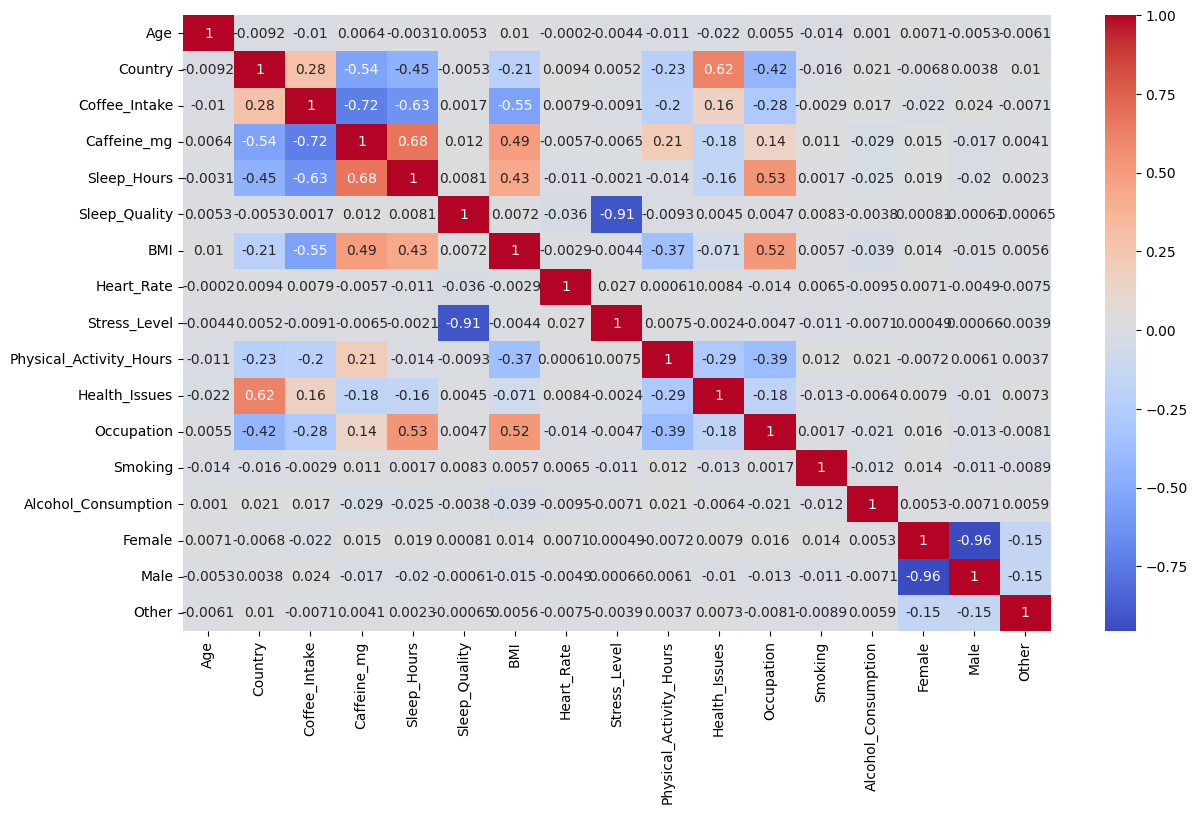

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
model = LinearRegression()
X = data_scaled.drop(columns = ['Heart_Rate'])
y = data_scaled['Heart_Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, train_size = 0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = mean_squared_error(pred, y_test)
print(y_test)
print(acc)
print(data_scaled)
df_corr = data_scaled.corr()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, cmap = 'coolwarm', annot = True)

1.2120186763133178
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


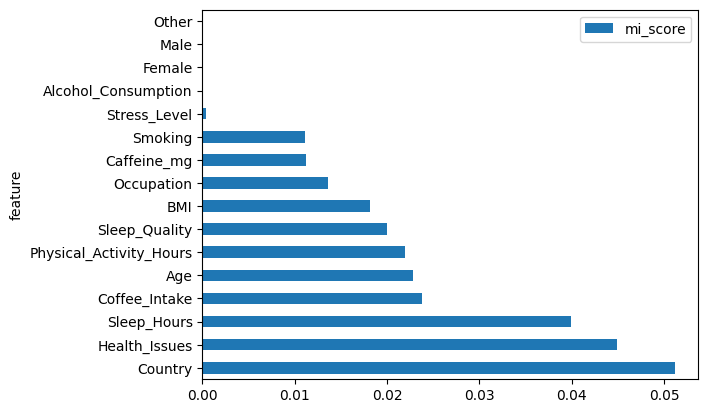

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
model3 = RandomForestRegressor(min_samples_split = 2, min_samples_leaf = 1, random_state = 42)
model3.fit(X_train, y_train)
mi_scores = mutual_info_regression(X_train, y_train)
mi_df = pd.DataFrame({
    "feature": X_train.columns,
    "mi_score": mi_scores
}).sort_values('mi_score', ascending = False)
mi_df.plot(kind = 'barh', x = 'feature', y = 'mi_score')
predict2 = model3.predict(X_test)
print(mean_squared_error(predict2, y_test))
for i in X_train.columns:
  print(X_train[i].isnull().sum())

In [9]:
print(data_scaled.head())
X = data_scaled.drop(columns=['Stress_Level'])
print(X.columns)
y = data['Stress_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(random_state = 42, min_samples_split = 2, verbose = False)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(round(accuracy_score(pred, y_test), 2))
print(classification_report(y_test, pred))
print(data.head())


        Age   Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  Sleep_Quality  \
0  0.452574  1.575283       0.590079    -0.973044    -1.564766       0.323492   
1 -0.174645 -0.221253      -1.173397     1.443273     1.031286       0.323492   
2  0.631779  0.814827      -0.043974    -0.083450     0.329822      -0.911211   
3  1.617409  2.113681       1.202076    -1.884158    -1.190558       0.323492   
4 -0.264247 -1.635942       0.742240    -0.837830    -0.245529      -0.911211   

        BMI  Heart_Rate  Stress_Level  Physical_Activity_Hours  Health_Issues  \
0  0.076503    0.751563     -0.604578                -0.787199       2.298863   
1 -0.728647   -0.368319     -0.604578                 0.634293      -0.330389   
2 -0.661321   -1.182779      0.917522                 1.251865       1.230300   
3 -0.899046    0.038911     -0.604578                -1.145452       1.242887   
4 -0.269598    0.547948      0.917522                 0.527765      -2.246676   

   Occupation   Smoking  A

In [ ]:
data2 = pd.read_csv('synthetic_coffee_health_10000.csv')
print(data2.head())
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
print(data2.dtypes)
data2["Health_Issues"] = data2['Health_Issues'].fillna(data2['Health_Issues'].mode()[0])

for i in data2.columns:
    print(f"The column is: {i}, it is comprised of {data2[i].dtype} and it has {data2[i].isnull().sum()} null values")

for i in data2.columns:
    if data2[i].dtype == "int64" and i != "Stress_Level":
        sns.scatterplot(x=data2[i], y = data2["Stress_Level"])
        plt.show()


   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption  
0           NaN      Other        0                    0 